In [1]:
#install gradio for user interface
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [2]:
#import the necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle

In [3]:
#read the csv file and print its first 5 records
df = pd.read_csv('Housing.csv')
df.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 12,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,NaN,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,NaN,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,NaN,11410000


In [4]:
#dropping empty column
df = df.drop(columns=['Unnamed: 12'])

In [5]:
#converting string datatypes to numerical values
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

#furnishing has 3 values
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

In [6]:
#split the dataset into training and testing
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)

#show the data
print("Training: ")
print(train_df.head(5))
print("\nTesting: ")
print(test_df.head(5))

Training: 
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
46                 0                1        1         0                 2   
93                 0                1        3         0                 1   
335                0                1        2         0                 2   
412                0                0        0         1                 0   
471                0                0        0         0                 0   

       price  
46   7525000  
93   6300000  
335  3920000  
412  3430000  


In [7]:
#check number of records in training
train_df.shape

(436, 13)

In [8]:
#check number of records in testing
test_df.shape

(109, 13)

In [9]:
#check for null values in training
train_null_values = train_df.isnull().sum()
print("Null values in Training:\n", train_null_values)

Null values in Training:
 area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [10]:
#check for null values in testing
test_null_values = test_df.isnull().sum()
print("Null values in Testing:\n", test_null_values)

Null values in Testing:
 area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [11]:
#datatypes in training
train_df.dtypes

,0
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64
parking,int64


In [12]:
#datatypes in testing
test_df.dtypes

,0
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64
parking,int64


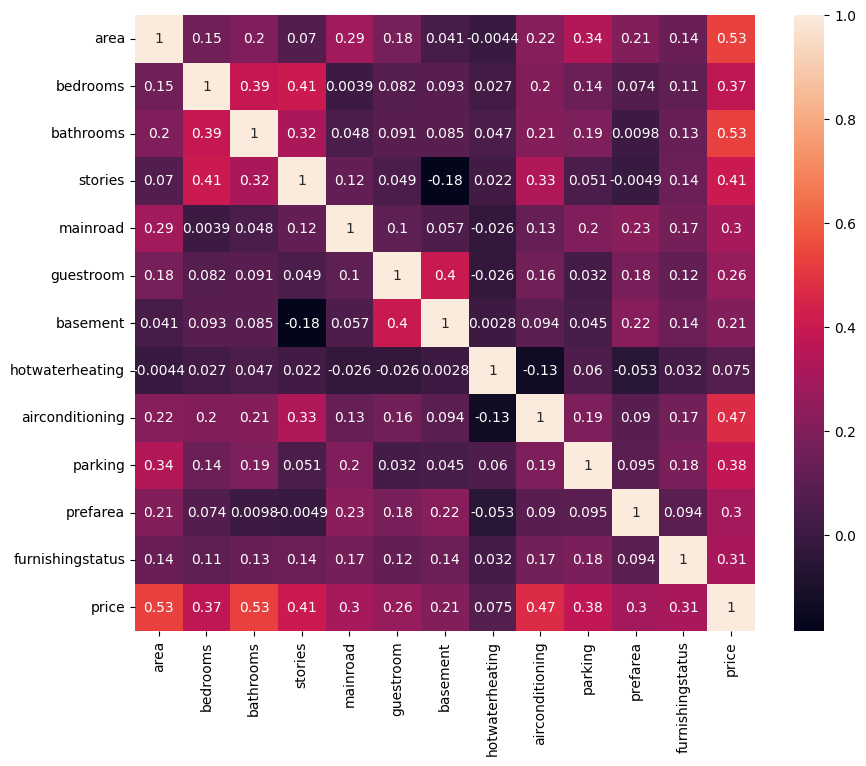

In [13]:
#heatmap
plt.figure(figsize=(10,8))
corr = train_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
#statistics of the training set
train_df.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,4.360000e+02
mean,5154.144495,2.958716,1.266055,1.782110,0.857798,0.178899,0.357798,0.050459,0.307339,0.685780,0.233945,0.940367,4.706527e+06
std,2204.313664,0.747804,0.477391,0.858093,0.349658,0.383708,0.479903,0.219141,0.461921,0.854941,0.423824,0.752696,1.757976e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.498250e+06
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.291000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,5.600000e+06
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.225000e+07


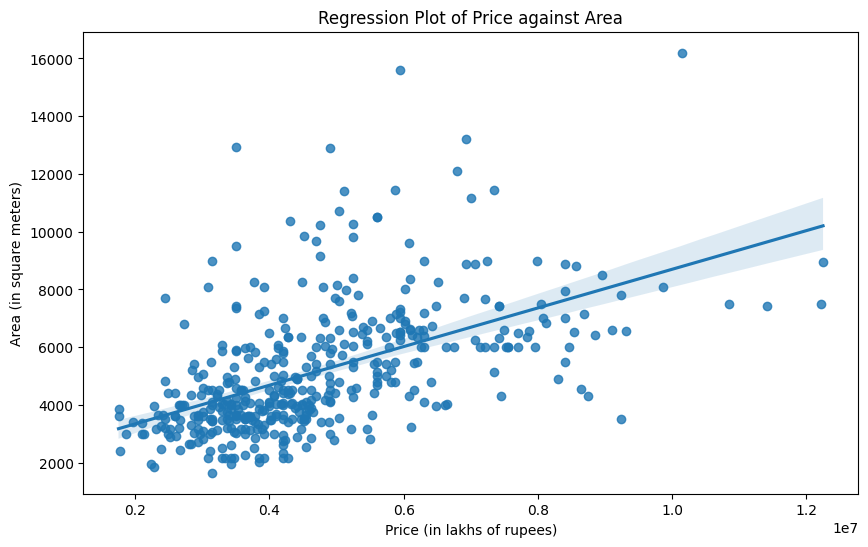

In [15]:
#regression plot of price against area of the house
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='area', data = train_df)
plt.title('Regression Plot of Price against Area')
plt.xlabel('Price (in lakhs of rupees)')
plt.ylabel('Area (in square meters)')
plt.show()

In [16]:
#pearson co-efficient
from scipy import stats
pear_coef, p_value = stats.pearsonr(train_df['price'], train_df['area'])
print("Pearson Correlation Co-efficient: ", pear_coef)
print("P-value: ", p_value)

Pearson Correlation Co-efficient:  0.5338195476608103
P-value:  1.74716111071497e-33


<Axes: xlabel='price', ylabel='area'>

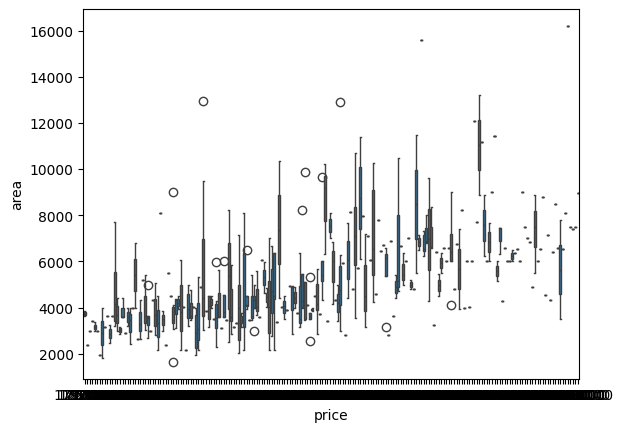

In [17]:
#box plot of price against area
sns.boxplot(x='price', y='area', data = train_df)

<Axes: xlabel='price', ylabel='bedrooms'>

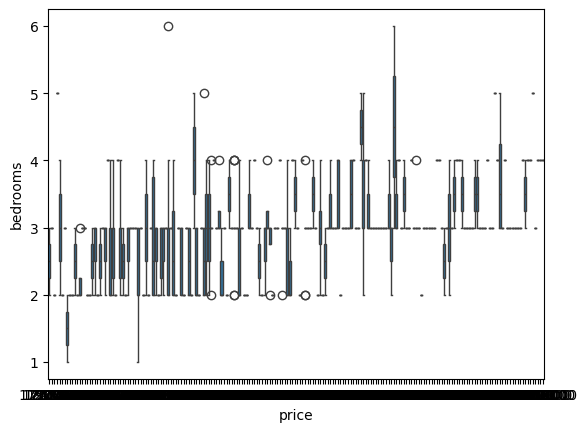

In [18]:
#boxplot of price against number of bedrooms
sns.boxplot(x='price', y='bedrooms', data = train_df)

<Axes: xlabel='price', ylabel='bathrooms'>

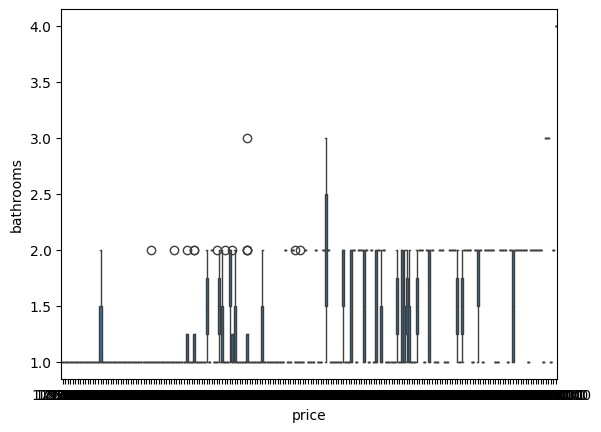

In [20]:
#boxplot of price against number of bathrooms
sns.boxplot(x='price', y='bathrooms', data = train_df)

<Axes: xlabel='price', ylabel='stories'>

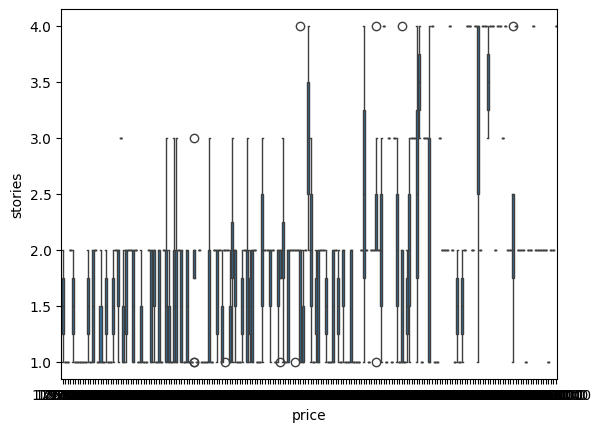

In [21]:
#boxplot of price against number of floors
sns.boxplot(x='price', y='stories', data = train_df)

<Axes: xlabel='price', ylabel='guestroom'>

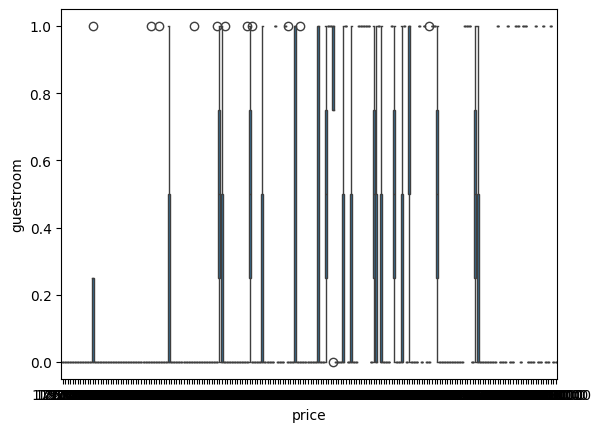

In [22]:
#boxplot of price against, if a guest room exists or not
sns.boxplot(x='price', y='guestroom', data = train_df)

<Axes: xlabel='price', ylabel='basement'>

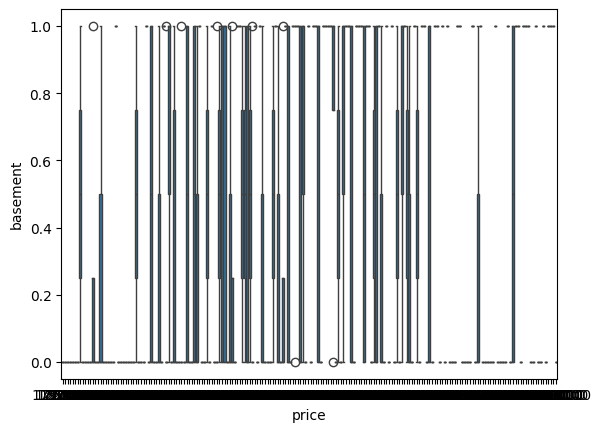

In [23]:
#boxplot of price against, if basement exists or not
sns.boxplot(x='price', y='basement', data = train_df)

<Axes: xlabel='price', ylabel='furnishingstatus'>

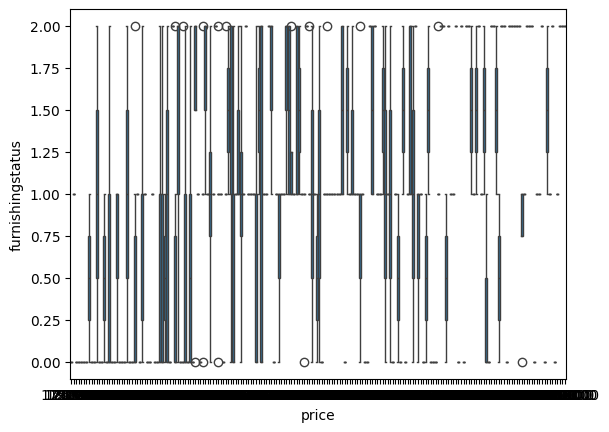

In [24]:
#boxplot of price against furnishing status
sns.boxplot(x='price', y='furnishingstatus', data = train_df)

In [25]:
#dropping unnecesssary columns
train_df_drop = train_df.drop('guestroom', axis=1, inplace = True)
train_df_drop = train_df.drop('basement', axis=1, inplace = True)

test_df_drop = test_df.drop('guestroom', axis=1, inplace = True)
test_df_drop = test_df.drop('basement', axis=1, inplace = True)

In [26]:
train_df.shape

(436, 11)

In [27]:
test_df.shape

(109, 11)

In [ ]:
# #z-core normalization
# import scipy.stats as stats
# train_df = stats.zscore(train_df)
# test_df = stats.zscore(test_df)

In [28]:
x_train = train_df.drop('price', axis=1)
y_train = train_df['price']

x_test = test_df

In [29]:
#linear regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
train_linear = linear_model.predict(x_train)

In [30]:
#rmse and mae for linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_rmse = mean_squared_error(y_train, train_linear)
print(f"Root Mean Squared Error (RMSE) for Linear Regression on Training set: {linear_rmse}")

linear_mae = mean_absolute_error(y_train, train_linear)
print(f"Mean Absolute Error (MAE) for Linear Regression on Training set: {linear_mae}")

Root Mean Squared Error (RMSE) for Linear Regression on Training set: 1018548017640.6027
Mean Absolute Error (MAE) for Linear Regression on Training set: 731900.2292475115


In [31]:
#random forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
train_rf = rf_model.predict(x_train)

In [32]:
#rmse and mae from random forest
rf_rmse = mean_squared_error(y_train, train_rf)
print(f"RMSE for Random Forest on Training Data is: {rf_rmse}")

rf_mae = mean_absolute_error(y_train, train_rf)
print(f"MAE for Random Forest on Training Data is: {rf_mae}")

RMSE for Random Forest on Training Data is: 178071283342.22095
MAE for Random Forest on Training Data is: 299583.94300458714


In [33]:
#residuals (linear regression)
linear_residuals = y_train - train_linear

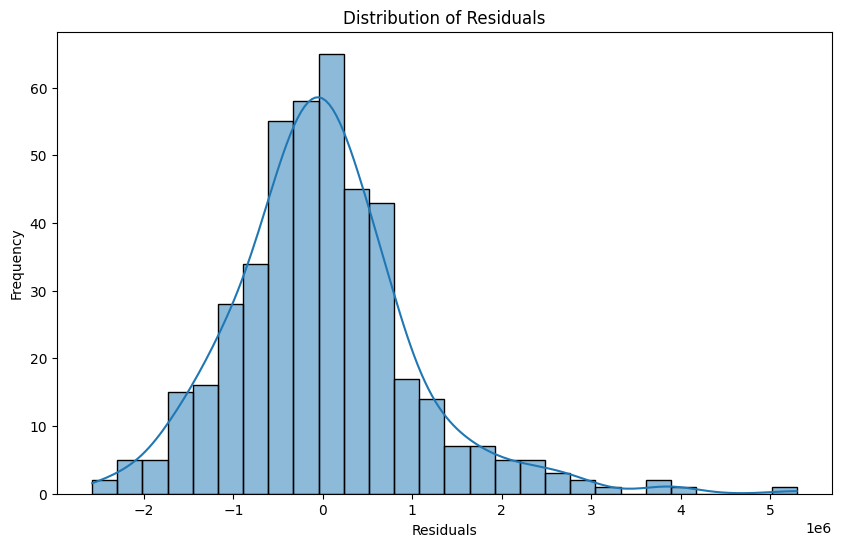

In [34]:
#histogram of residuals (linear regression)
plt.figure(figsize=(10,6))
sns.histplot(linear_residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

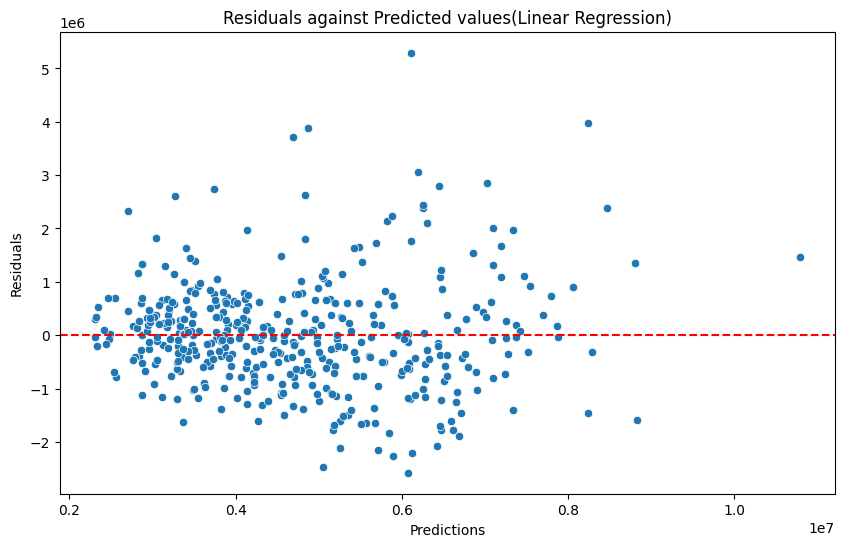

In [35]:
#scatterplot of predictions against residuals (linear regression)
plt.figure(figsize=(10,6))
sns.scatterplot(x=train_linear, y=linear_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals against Predicted values(Linear Regression)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [36]:
#residuals(Random Forest)
rf_residuals = y_train - train_rf

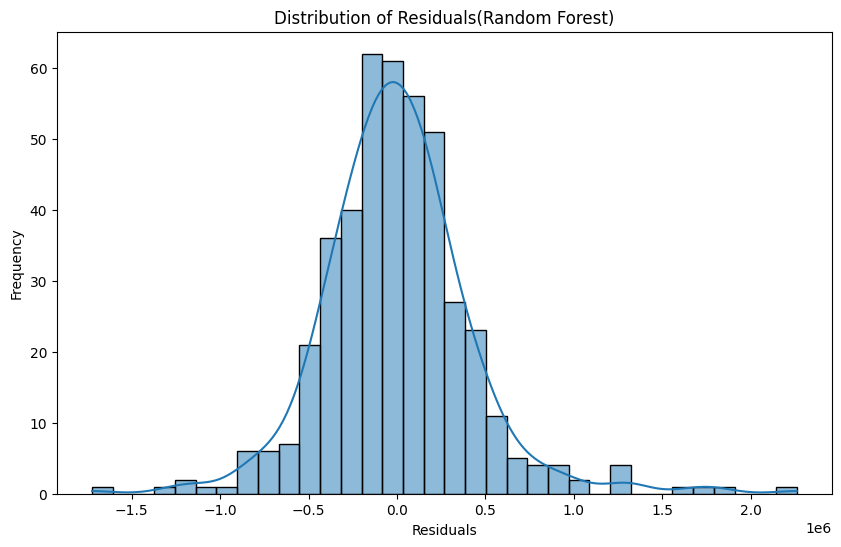

In [37]:
#histogram of residual (random forest)
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, kde=True)
plt.title('Distribution of Residuals(Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

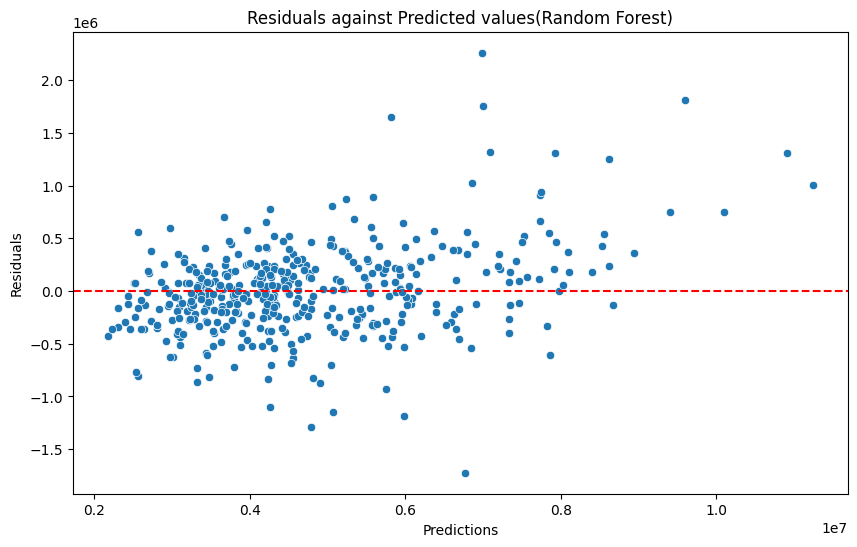

In [38]:
#scatterplot of predictions against residuals (random forest)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_rf, y=rf_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals against Predicted values(Random Forest)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [39]:
#final results
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression MAE: {linear_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print("\n")

if linear_rmse < rf_rmse:
  print("Linear Regresion performs better when considering RMSE")
else:
  print("Random Forest performs better when considering RMSE")

if linear_mae < rf_mae:
  print("Linear Regression performs better when considering MAE")
else:
  print("Random Forest performs better when considering MAE")

Linear Regression RMSE: 1018548017640.6027
Linear Regression MAE: 731900.2292475115
Random Forest RMSE: 178071283342.22095
Random Forest MAE: 299583.94300458714


Random Forest performs better when considering RMSE
Random Forest performs better when considering MAE


In [42]:
#running a user interface for the model
import gradio as gr
import pandas as pd

def predict_price(bedrooms, area, location, furnishing):
    input_df = pd.DataFrame({
        'bedrooms': [bedrooms],
        'prefarea': [prefarea],
        'furnishing': [furnishing]
    })
    prediction = model.predict(input_df)
    return f"Estimated Price: {prediction[0]:,.2f}"

demo = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(1, 10, step=1, label="Bedrooms"),
        gr.Slider(500, 10000, step=100, label="Area (sq ft)"),
        gr.Radio(["furnished", "semi-furnished", "unfurnished"], label="furnishingstatus")
    ],
    outputs="text"
)

demo.launch(share=True)


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1023: UserWarning: Expected 4 arguments for function <function predict_price at 0x7dab127127a0>, received 3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1027: UserWarning: Expected at least 4 arguments for function <function predict_price at 0x7dab127127a0>, received 3.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://617b909ef933396ef0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
